<a href="https://colab.research.google.com/github/sitikharomah/202255202001-Siti-Kharomah/blob/main/Klasifikasi_DatasetMultilabel_Telur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [4]:
from google.colab import files
upload=files.upload()

Saving kaggle.json to kaggle.json


In [5]:
import os
os.environ["KAGGLE_USERNAME"] = "skharomah" # Ganti dengan username Kaggle Anda
os.environ["KAGGLE_KEY"] = "c/content/kaggle.json" # Ganti dengan key yang ada di kaggle.json

In [6]:
!kaggle datasets download -d skharomah/klasifikasi-multilabel-telur

Dataset URL: https://www.kaggle.com/datasets/skharomah/klasifikasi-multilabel-telur
License(s): CC0-1.0


In [7]:
# prompt: unzip file klasifikasi-multilabel-telur.zip

!unzip klasifikasi-multilabel-telur.zip


Archive:  klasifikasi-multilabel-telur.zip
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505001.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505002.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505003.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505004.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505005.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505006.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505007.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505008.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505009.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505010.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505011.jpg  
  inflating: DatasetMultilable_Siti Kharomah_202255202001/jt202505012.jpg  
  inflating: DatasetMultilable_Siti Kharomah_

In [12]:
#Now let us read metadata to get our Y values (multiple lables)
df = pd.read_csv('/content/traindataset_siti kharomah_202255202001.csv', sep=';')
print(df.head())     # printing first five rows of the file
print(df.columns)

df = df.iloc[:2000]  #Loading only first 1000 datapoints for memory reasons
#Need to read images using the tag from metadata.
#Otherwise, if read directly from the folder then images may not correspond to
#the metadata from the csv file.

            id               jenis telur  telur bebek  telur puyuh  \
0  jt202505001  telur bebek, telur ayam             1            0   
1  jt202505002  telur bebek, telur ayam             1            0   
2  jt202505003  telur bebek, telur ayam             1            0   
3  jt202505004  telur bebek, telur ayam             1            0   
4  jt202505005  telur bebek, telur ayam             1            0   

    telur ayam  telur asin  telur kampung  
0            1           0              0  
1            1           0              0  
2            1           0              0  
3            1           0              0  
4            1           0              0  
Index(['id', 'jenis telur', 'telur bebek', 'telur puyuh', ' telur ayam',
       'telur asin', 'telur kampung'],
      dtype='object')


In [17]:
SIZE = 200
X_dataset = []
#Define image_directory before it's used in the loop
image_directory = '/content/DatasetMultilable_Siti Kharomah_202255202001/' # Change to extracted image directory
for i in tqdm(range(df.shape[0])):
    # Access the image filename using df['id'][i] instead of df['Id'][i]
    img = image.load_img(image_directory + df['id'][i]+'.jpg', target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

X = np.array(X_dataset)

100%|██████████| 309/309 [00:27<00:00, 11.09it/s]


In [22]:
#
print(df['id'][7])  #telur bebek,telur ayam

jt202505008


In [23]:
print(df['jenis telur'][7])  #Tagged as multiple jenis telur.

telur bebek, telur ayam 


In [24]:
#Id and jenis telur are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(df.drop(['id', 'jenis telur'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

In [29]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid')) # Changed the output layer to 5 units


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 196, 196, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 196, 196, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 94, 94, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 47, 47, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 43, 43, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 17, 17, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701,477 (2.68 MB)

 Trainable params: 701,125 (2.67 MB)

 Non-trainable params: 352 (1.38 KB)

In [30]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.1887 - loss: 1.0144 - val_accuracy: 0.3441 - val_loss: 0.6912
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.3020 - loss: 0.7287 - val_accuracy: 0.3656 - val_loss: 0.6960
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.2393 - loss: 0.7114 - val_accuracy: 0.5484 - val_loss: 0.7077
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3094 - loss: 0.6536 - val_accuracy: 0.5484 - val_loss: 0.7152
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3317 - loss: 0.5608 - val_accuracy: 0.5484 - val_loss: 0.7439
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3413 - loss: 0.5522 - val_accuracy: 0.5484 - val_loss: 0.8086
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3755 - loss: 0.5469 - val_accuracy: 0.5484 - val_loss: 0.8666
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3671 - loss: 0.4655 - val_accuracy: 0.5484 - val_loss: 0.9948


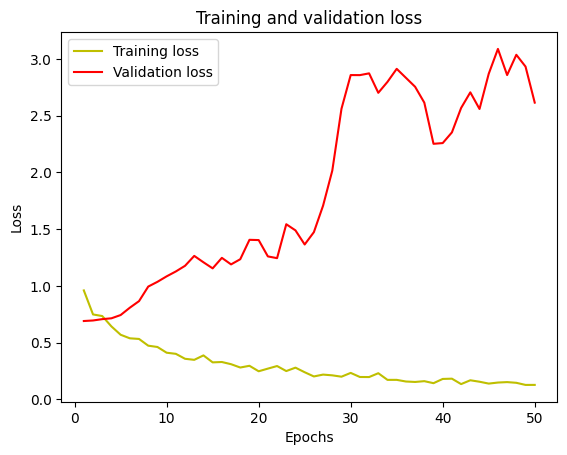

In [32]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

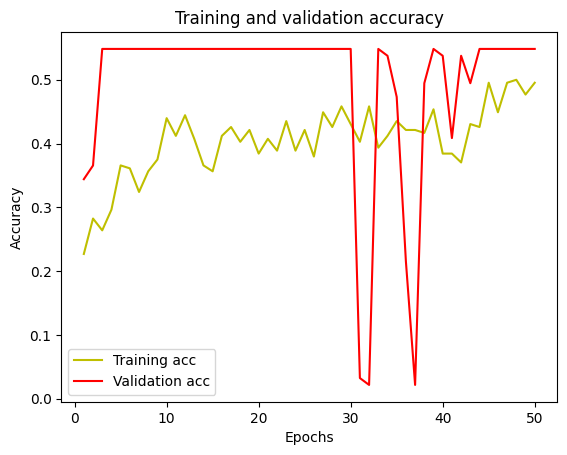

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step


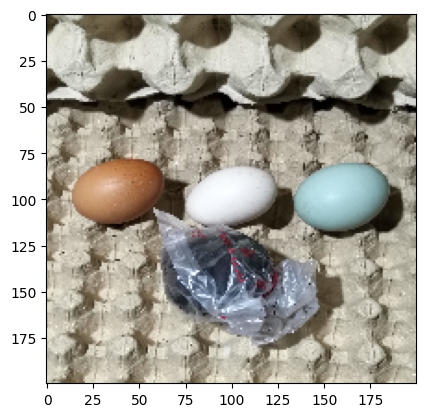

In [34]:
#Validate on an image
#img = image.load_img('/content/DatasetMultilable_Siti Kharomah_202255202001/jt202505213.jpg', target_size=(SIZE,SIZE,3))
# Assuming 'ddlj.jpg' is in '/content/DatasetMultilable_Siti Kharomah_202255202001'
img = image.load_img('/content/DatasetMultilable_Siti Kharomah_202255202001/jt202505213.jpg', target_size=(SIZE,SIZE,3))

img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

In [36]:
#Print classes and corresponding probabilities
for i in range(len(classes)): # Changed loop range to the length of classes
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

telur bebek (1.0)
 telur ayam (0.99)
telur puyuh (0.0104)
telur kampung (0.00407)
telur asin (0.000618)


In [37]:
###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5593 - loss: 2.6180
Accuracy =  54.83871102333069 %


In [38]:
# prompt: berikan code evaluasi model

from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels (e.g., using a threshold)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming 0.5 as the threshold

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


# Calculate and print the confusion matrix (optional)
# Note: Confusion matrices are best visualized for binary or few-class problems
# For multi-label, confusion matrix for each label is more informative
for i in range(len(classes)):
  print(f"Confusion Matrix for {classes[i]}:")
  print(confusion_matrix(y_test[:,i], y_pred_classes[:,i]))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step
               precision    recall  f1-score   support

  telur bebek       0.55      1.00      0.71        51
  telur puyuh       0.76      0.36      0.49        61
   telur ayam       0.78      0.98      0.87        59
   telur asin       0.00      0.00      0.00        55
telur kampung       0.00      0.00      0.00        52

    micro avg       0.67      0.47      0.55       278
    macro avg       0.42      0.47      0.41       278
 weighted avg       0.43      0.47      0.42       278
  samples avg       0.65      0.48      0.54       278

Confusion Matrix for telur bebek:
[[ 0 42]
 [ 0 51]]
Confusion Matrix for telur puyuh:
[[25  7]
 [39 22]]
Confusion Matrix for  telur ayam:
[[18 16]
 [ 1 58]]
Confusion Matrix for telur asin:
[[38  0]
 [55  0]]
Confusion Matrix for telur kampung:
[[41  0]
 [52  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
